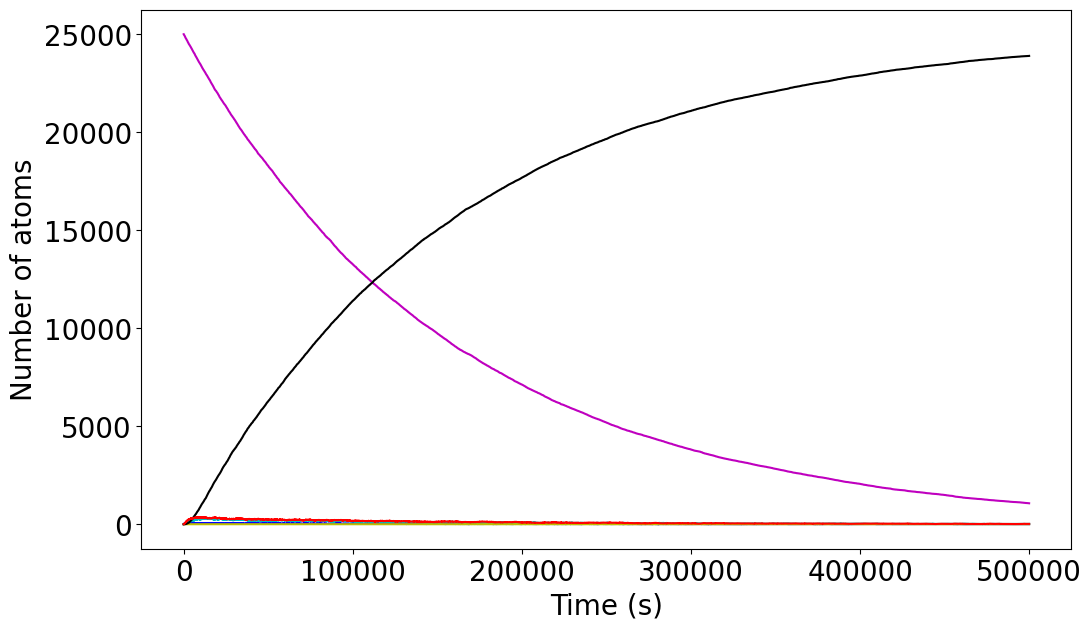

In [41]:
#The original code! Bismuth 213 --> Thalium --> lead --> bismuth 209 OR bismuth 213 --> lead --> bismuth 209
# The new one has four possible paths:
# 1. Radon --> Polonium --> bismuth 214 --> Lead 207
# 2. Radon --> Polonium --> Lead 214 --> Bismuth 214 --> Lead 207
# 3. Radon --> Polonium --> Bismuth 214 --> Thalium --> Lead 207
# 4. Radon --> Polonium --> Lead 214 --> Bismuth 214 --> Thalium --> Lead 207

import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show
from matplotlib import pyplot as plt


def run_code():

    N_Radon = 25000                   # Initial Number of Radon atoms
    N_Polonium = 0                    # initial Number of Polonium atoms
    N_Bismuth = 0                         # intial number of Bismuth 214 atoms
    N_Pb207 = 0                       # initial number of lead 207 atoms
    N_Pb214 = 0                       # initial number of lead 214 atoms
    N_Thalium = 0                      # initial number of thalium atoms
    Decay_radon= 110592               # Half life of Radon in seconds
    Decay_Polonium = 186             # half life of polonium in seconds
    Decay_Pb214  = 1608              # half life of lead 214 in seconds
    Decay_Bismuth = 1194             # half life of bismuth in seconds
    Decay_Thalium = 78                 # half life of thalium in seconds

    h = 1                            # Size of time-step in seconds
    p_Radon = 1 - 2**(-h/Decay_radon)  # Probability of decay radon in one step
    p_Polonium = 1 - 2**(-h/Decay_Polonium)         #probability of decay polonium in one step
    p_Pb214 = 1 - 2**(-h/Decay_Pb214)          # probability of decay lead 214 in one step
    p_Bismuth = 1 - 2**(-h/Decay_Bismuth)       # probability of decay bismuth in one step
    p_Thalium = 1 - 2**(-h/Decay_Thalium)          # probability of decay thalium in one step
    tmax = 500000                            # Total time ***NOTE!!!! This is just a random arbitrary time I picked, may need adjustment

    alpha = 0
    R = 0
    Beta = 0
    Zeta = 0


# Lists of plot points
    tpoints = arange(0,tmax,h) # make time array
    Radonpoints = [] # empty array to store # of Radon atoms at each time step
    Poloniumpoints = [] # empty array to store # of Polonium atoms at each time step
    Pb214points = [] #empty array for # of lead 214 atoms at each step
    Bismuthpoints = [] #empty array for number of Bismuth atoms at each step
    Pb207points = [] #empty array for number of lead 207 atoms at each step
    Thaliumpoints = [] #empty array for number of thalium atoms at each step

# Main loop
    for t in tpoints:    # for time 0-40000 sec
        Radonpoints.append(N_Radon) # append starting # of Radon atoms
        Poloniumpoints.append(N_Polonium) # append starting # of Polonium atoms
        Pb214points.append(N_Pb214) # append starting # of lead 214 atoms
        Bismuthpoints.append(N_Bismuth) #append starting # of bismuth atoms
        Pb207points.append(N_Pb207) #append starting # of lead 207 atoms
        Thaliumpoints.append(N_Thalium) #append starting # of thalium atoms
        
    # Calculate the number of THALIUM atoms that decay 
        Decay_Thalium = 0
        for i in range(N_Thalium): # determine number of atoms that decay
            if np.random.random() < p_Thalium:
                Decay_Thalium += 1
                Beta += 0.5
        N_Thalium -= Decay_Thalium # subtract number of decayed Parent atoms 
        N_Pb207 += Decay_Thalium # add number of decayed Daughter atoms

        # calculate the number of BISMUTH atoms that decay
        Decay_Bismuth = 0
        for i in range(N_Bismuth): # determine number of atoms that decay
            if np.random.random() < p_Bismuth:
                if np.random.random() < 0.97:
                    R += 7
                    N_Pb207 += 1
                else:
                    alpha += 5
                    N_Thalium += 1
                Decay_Bismuth += 1
        N_Bismuth -= Decay_Bismuth

        #calculate the number of Lead 214 atoms that decay
        Decay_Pb214 = 0
        for i in range(N_Pb214): # determine number of atoms that decay
            if np.random.random() < p_Pb214:
                Decay_Pb214 += 1
                Zeta += 10
        N_Pb214 -= Decay_Pb214 # subtract number of decayed Parent atoms 
        N_Bismuth += Decay_Pb214 # add number of decayed Daughter atoms

        #calculate the number of POLONIUM atoms that decay
        Decay_Polonium = 0
        for i in range(N_Polonium): # determine number of atoms that decay
            if np.random.random() < p_Polonium:
                if np.random.random() < 0.908:
                    alpha += 5
                    N_Pb214 += 1
                else:
                    Beta += 0.5
                    N_Bismuth += 1
                Decay_Polonium += 1
        N_Polonium -= Decay_Polonium # subtract number of decayed Parent atoms



#calculate the number of Radon atoms that decay
        Decay_Radon = 0
        for i in range(N_Radon): # determine number of atoms that decay
            if np.random.random() < p_Radon:
                Decay_Radon += 1
                R += 7
        N_Radon -= Decay_Radon # subtract number of decayed Parent atoms 
        N_Polonium += Decay_Radon # add number of decayed Daughter atoms
    
    return alpha, Beta, Zeta, R, tpoints, Radonpoints, Poloniumpoints, Pb214points, Bismuthpoints, Thaliumpoints, Pb207points

(avar, bvar, zvar, rvar, tpoints, Radonpoints1, Poloniumpoints1, Pb214points1, Bismuthpoints1, Thaliumpoints1, Pb207points1) = run_code()
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.plot(tpoints,Radonpoints1, c='m') # plot Bi213 vs. time
ax.plot(tpoints,Poloniumpoints1, c='b') # plot Bi209 vs. time
ax.plot(tpoints,Bismuthpoints1, c='c') # plot Tl vs. time
ax.plot(tpoints,Thaliumpoints1, c='y') # plot Pb vs. time
ax.plot(tpoints, Pb207points1, c = 'k') 
ax.plot(tpoints, Pb214points1, c= 'r')
# add the labels
ax.set_xlabel("Time (s)",size=20)   # allows LaTeX style formating
ax.set_ylabel("Number of atoms",size=20)   # allows LaTeX style formating

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()


In [ ]:
#=========================================================================================================================
#=========================================================================================================================

print("alpha = ", avar, " MeV")
print("R = ", rvar, " MeV")
print("Beta = ", bvar, " MeV")
print("Zeta = ", zvar, " MeV")

alpha_all = 0
R_all = 0
Beta_all = 0
Zeta_all = 0
for number in range (12):
    print(number, "done")
    a, b, z, r, random1, random2, random3, random4, random5, random6, random7 = run_code()
    alpha_all += a
    R_all += r
    Beta_all += b
    Zeta_all += z

avg_alpha = alpha_all/12
avg_beta = Beta_all/12
avg_R = R_all/12
avg_Zeta = Zeta_all/12

numerator_alpha = 0
numerator_beta = 0
numerator_R = 0
numerator_Zeta = 0

for value in range (12):
    A, B, Z, Rho, rand1, rand2, rand3, rand4, rand5, rand6, rand7 = run_code()
    numerator_alpha += (A - avg_alpha)**2
    numerator_beta += (B - avg_beta)**2
    numerator_R += (Rho - avg_R)**2
    numerator_Zeta += (Z - avg_Zeta)**2
    print (value, "done")

avg_total = avg_alpha + avg_beta + avg_R + avg_Zeta


print("average total energy = ", avg_total, "MeV")

sd_total = np.sqrt(np.sum(((a + b + z + r)-avg_total)**2)/11)

print("standard deviation of total energy = ", sd_total)

print ("average alpha energy = ", avg_alpha, "MeV")
print ("average Beta energy = ", avg_beta, "MeV")
print ("average R energy = ", avg_R, "MeV")
print ("average Zeta energy = ", avg_Zeta, "MeV")

sd_alpha = np.sqrt(numerator_alpha/11)
sd_beta = np.sqrt(numerator_beta/11)
sd_r = np.sqrt(numerator_R/11)
sd_Zeta = np.sqrt(numerator_Zeta/11)

print("standard deviation of alpha = ", sd_alpha)
print("standard deviation of beta = ", sd_beta)
print("standard deviation of R = ", sd_r)
print("standard deviation of zeta = ", sd_Zeta)

print("You need to block ", avg_alpha + (3*sd_alpha), " MeV of energy")
print("You need to block ", avg_beta + (3*sd_beta), " MeV of energy")
print("You need to block ", avg_R + (3*sd_r), " MeV of energy")
print("You need to block ", avg_Zeta + (3*sd_Zeta), " MeV of energy")



#the total average should be roughly 6.4 mil to 17.7 mil

alpha =  112545  MeV
R =  329728  MeV
Beta =  1432.5  MeV
Zeta =  217700  MeV
0 done
